In [1]:
#   Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and 

#               you were asked to provide the below data to the higher authorities for further action.

In [2]:
#     4.1  "Create 3 clusters as below.

#          1. Sensitive Area's

#          2. Moderate Area's

#          3. Peaceful Area's"

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [5]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [6]:
x = df[['DISTRICT','MURDER','ATTEMPT TO MURDER','RAPE','CUSTODIAL RAPE','DACOITY','THEFT','DOWRY DEATHS','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','TOTAL IPC CRIMES']]
x

,DISTRICT,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,DACOITY,THEFT,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
0,ADILABAD,101,60,50,0,9,199,16,0,4154
1,ANANTAPUR,151,125,23,0,8,366,7,0,4125
2,CHITTOOR,101,57,27,0,4,723,14,0,5818
3,CUDDAPAH,80,53,20,0,1,173,17,0,3140
4,EAST GODAVARI,82,67,23,0,4,1021,12,0,6507
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,0,0,0,0,0,7,0,0,60
9013,TOTAL,0,0,0,0,0,7,0,0,60
9014,KARAIKAL,5,6,6,0,0,81,0,0,787
9015,PUDUCHERRY,24,21,7,0,5,577,0,0,3494


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lab_enc = LabelEncoder()

x['DISTRICT'] = lab_enc.fit_transform(x['DISTRICT'])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.cluster import KMeans

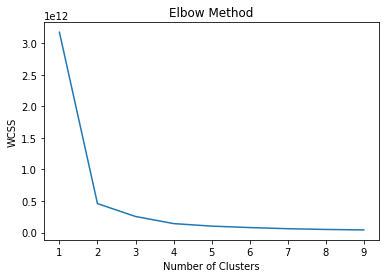

In [11]:
wcss = []

for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=41)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,10),wcss)

plt.title('Elbow Method')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [12]:
kmeans = KMeans(n_clusters=2,random_state=40)

y_kmeans = kmeans.fit_predict(x)

print(y_kmeans)

[0 0 0 ... 0 0 0]


In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(x,y_kmeans)

0.9683151974725

In [15]:
cluster_0 = x[y_kmeans==0]

print(cluster_0)

      DISTRICT  MURDER  ATTEMPT TO MURDER  RAPE  CUSTODIAL RAPE  DACOITY  \
0            3     101                 60    50               0        9   
1           28     151                125    23               0        8   
2          154     101                 57    27               0        4   
3          172      80                 53    20               0        1   
4          220      82                 67    23               0        4   
...        ...     ...                ...   ...             ...      ...   
9012       453       0                  0     0               0        0   
9013       753       0                  0     0               0        0   
9014       382       5                  6     6               0        0   
9015       589      24                 21     7               0        5   
9016       753      29                 27    13               0        5   

      THEFT  DOWRY DEATHS  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0       199  

In [16]:
cluster_1 = x[y_kmeans==1]

print(cluster_1)

      DISTRICT  MURDER  ATTEMPT TO MURDER  RAPE  CUSTODIAL RAPE  DACOITY  \
28         753    2602               1555   871               0      214   
115        753    3643               3419   888               0     1291   
169        753    1226                537   286               0      327   
285        753    1626               1475   293               0      178   
302        753     472                615   562               0      176   
...        ...     ...                ...   ...             ...      ...   
8657       753    2712               2168  1839               0      793   
8806       753    1461               1538  2049               0       31   
8851       753    1949               2954   737               0       97   
8938       753    4966               4811  1963               0      322   
8982       753    2252               2854  2046               0      279   

      THEFT  DOWRY DEATHS  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
28    16751  

In [17]:
# 1. Sensitive area

In [18]:
cluster_1

,DISTRICT,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,DACOITY,THEFT,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
28,753,2602,1555,871,0,214,16751,420,7,130089
115,753,3643,3419,888,0,1291,9701,859,83,88432
169,753,1226,537,286,0,327,15834,67,0,103419
285,753,1626,1475,293,0,178,12868,220,0,109098
302,753,472,615,562,0,176,5441,27,0,103847
...,...,...,...,...,...,...,...,...,...,...
8657,753,2712,2168,1839,0,793,47476,329,0,202700
8806,753,1461,1538,2049,0,31,23314,478,0,170948
8851,753,1949,2954,737,0,97,11996,110,0,200474
8938,753,4966,4811,1963,0,322,37376,2244,0,198093


In [19]:
#  2. Moderate area

In [20]:
cluster_0

,DISTRICT,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,DACOITY,THEFT,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
0,3,101,60,50,0,9,199,16,0,4154
1,28,151,125,23,0,8,366,7,0,4125
2,154,101,57,27,0,4,723,14,0,5818
3,172,80,53,20,0,1,173,17,0,3140
4,220,82,67,23,0,4,1021,12,0,6507
...,...,...,...,...,...,...,...,...,...,...
9012,453,0,0,0,0,0,7,0,0,60
9013,753,0,0,0,0,0,7,0,0,60
9014,382,5,6,6,0,0,81,0,0,787
9015,589,24,21,7,0,5,577,0,0,3494


In [21]:
# 3. Peaceful area


# No peaceful area is showing after clustering

In [22]:
#  4.2  Create DataFrame for each cluster that shows data according to the areas.

In [23]:
Sensitive_area = cluster_1

Sensitive_area

,DISTRICT,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,DACOITY,THEFT,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
28,753,2602,1555,871,0,214,16751,420,7,130089
115,753,3643,3419,888,0,1291,9701,859,83,88432
169,753,1226,537,286,0,327,15834,67,0,103419
285,753,1626,1475,293,0,178,12868,220,0,109098
302,753,472,615,562,0,176,5441,27,0,103847
...,...,...,...,...,...,...,...,...,...,...
8657,753,2712,2168,1839,0,793,47476,329,0,202700
8806,753,1461,1538,2049,0,31,23314,478,0,170948
8851,753,1949,2954,737,0,97,11996,110,0,200474
8938,753,4966,4811,1963,0,322,37376,2244,0,198093


In [24]:
Moderate_area = cluster_0

Moderate_area

,DISTRICT,MURDER,ATTEMPT TO MURDER,RAPE,CUSTODIAL RAPE,DACOITY,THEFT,DOWRY DEATHS,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,TOTAL IPC CRIMES
0,3,101,60,50,0,9,199,16,0,4154
1,28,151,125,23,0,8,366,7,0,4125
2,154,101,57,27,0,4,723,14,0,5818
3,172,80,53,20,0,1,173,17,0,3140
4,220,82,67,23,0,4,1021,12,0,6507
...,...,...,...,...,...,...,...,...,...,...
9012,453,0,0,0,0,0,7,0,0,60
9013,753,0,0,0,0,0,7,0,0,60
9014,382,5,6,6,0,0,81,0,0,787
9015,589,24,21,7,0,5,577,0,0,3494


In [25]:
#  4.3  "Analyse your clusters and prepare a report that explains all your observations.


#      Example - 

#      1. What is impacting more crimes in sensitive areas. 

#      2. What needs to be done to reduce crime. 

#      3. Most safe and unsafe districts.

#      4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

In [26]:
#     1.  Theft is impacting more over the sensitive areas.

#     2.  More strict rules should be applied on these sensitive areas to reduce the crime rate.


In [27]:
#  4.4   Capstone project overall story in your own words. Min 1000 words.

In [28]:
#  first of all, i have collected the data as per instructions given for the most first phase of this project.

#  in the data collection phase , i have collected all data from a open platform "Kaggle".

#  in this phase, i have collected different type of data related to criminal activities

#  population data is also collected, literacy data is also collected.

#  in crime data, different type of data has collected.

#  more details are given in the dataset.

#  collected data is in the form of csv in excel sheet.

#  after data collection phase, analysis phase of this project has started.

#  in this phase, i have used the very first data of dataset provided along with this project.

#  during the analysis, I have face many critical situation of which I was unaware.

#  analysis part was divided into 6 parts.

# below are the details, which I have taken out by analysis.

In [29]:
# Crime report of Andhra Pradesh



# In 2001, murder has happened 2602 times. Attempt to murder has happened 1555 times. 

# Rape has happened 871 times. Other rape has happened also 871 times.

# The case of Kidnapping & abduction has happened 1182 times.

# The case of kidnapping and abduction of women and girls has happened 765 times.

# The case of kidnapping and abduction of others has happened 417 times.

# The case of Dacoity has happened 214 times.

# Preparation and assembly for dacoity has happpened 9 times.

# The case of robbery has happened 629 times.

# The case of burglary has happened 7220 times.

# The case of theft has happened 16751 times.

# The case of auto theft has happened 3051 times.

# The case of other theft has happened 13700 times.

# The case of riots has happened 3001 times.

# The case of criminal breach of trust has happened 788 times.

# The case of cheating has happened 5391 times.

# The case of counter-fighting has happened 144 times.

# The case of arson has happpened 872 times.

# The case of hurt has happened 34947 times.

# The case of dowry death has happened 420 times.

# The case of assault on women with intent to outrage her modesty has happened 3544 times.

# The case of insult to modesty of women has happened 2271 times.

# The case of cruelty by husband or his relatives has happened 5791 times.

# The case of importation of girls form foreign countries has happened 7 times.

# The case of causing death by neglience has happened 7400 times.

# The case of other IPC crimes has happened 34344 times.

# The case of Total IPC crimes has happened 130089 times.

In [30]:
# Crime report for Arunachal Pradesh



# In 2001, murder has happened 83 times. Attempt to murder has happened 53 times. 

# Rape has happened 3 times. Other rape has happened also 33 times.

# The case of Kidnapping & abduction has happened 33 times.

# The case of kidnapping and abduction of women and girls has happened 83 times.

# The case of kidnapping and abduction of others has happened 55 times.

# The case of Dacoity has happened 28 times.

# Preparation and assembly for dacoity has happpened 2 times.

# The case of robbery has happened 84 times.

# The case of burglary has happened 248 times.

# The case of theft has happened 443 times.

# The case of auto theft has happened 36 times.

# The case of other theft has happened 407 times.

# The case of riots has happened 24 times.

# The case of criminal breach of trust has happened 41 times.

# The case of cheating has happened 30 times.

# The case of counter-fighting has happened 4 times.

# The case of arson has happpened 4 times.

# The case of hurt has happened 13 times.

# The case of dowry death has happened 466 times.

# The case of assault on women with intent to outrage her modesty has happened 78 times.

# The case of insult to modesty of women has happened 3 times.

# The case of cruelty by husband or his relatives has happened 11 times.

# The case of importation of girls form foreign countries has happened 0 times.

# The case of causing death by neglience has happened 0 times.

# The case of other IPC crimes has happened 618 times.

# The case of Total IPC crimes has happened 2342 times.

In [31]:
# Crime report of Assam



# In 2001, murder has happened 1356 times. Attempt to murder has happened 481 times. 

# Rape has happened 40. Other rape has happened also 817 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 817 times.

# The case of kidnapping and abduction of others has happened 1480 times.

# The case of Dacoity has happened 1070 times.

# Preparation and assembly for dacoity has happpened 410 times.

# The case of robbery has happened 532 times.

# The case of burglary has happened 14 times.

# The case of theft has happened 687 times.

# The case of auto theft has happened 2423 times.

# The case of other theft has happened 5367 times.

# The case of riots has happened 350 times.

# The case of criminal breach of trust has happened 5017 times.

# The case of cheating has happened 2953 times.

# The case of counter-fighting has happened 374 times.

# The case of arson has happpened 575 times.

# The case of hurt has happened 46 times.

# The case of dowry death has happened 441 times.

# The case of assault on women with intent to outrage her modesty has happened 5805 times.

# The case of insult to modesty of women has happened 59 times.

# The case of cruelty by husband or his relatives has happened 850 times.

# The case of importation of girls form foreign countries has happened 4 times.

# The case of causing death by neglience has happened 1240 times.

# The case of other IPC crimes has happened 9315 times.

# The case of Total IPC crimes has happened 36877 times.

In [32]:
# Crime report of Bihar



# In 2001, murder has happened 3643 times. Attempt to murder has happened 3419 times. 

# Rape has happened 255. Other rape has happened also 888 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 888 times.

# The case of kidnapping and abduction of others has happened 2159 times.

# The case of Dacoity has happened 518 times.

# Preparation and assembly for dacoity has happpened 1641 times.

# The case of robbery has happened 1291 times.

# The case of burglary has happened 147 times.

# The case of theft has happened 2203 times.

# The case of auto theft has happened 3233 times.

# The case of other theft has happened 9701 times.

# The case of riots has happened 1050 times.

# The case of criminal breach of trust has happened 8651 times.

# The case of cheating has happened 8606 times.

# The case of counter-fighting has happened 946 times.

# The case of arson has happpened 1659 times.

# The case of hurt has happened 85 times.

# The case of dowry death has happened 502 times.

# The case of assault on women with intent to outrage her modesty has happened 7544 times.

# The case of insult to modesty of women has happened 859 times.

# The case of cruelty by husband or his relatives has happened 21 times.

# The case of importation of girls form foreign countries has happened 1558 times.

# The case of causing death by neglience has happened 2406 times.

# The case of other IPC crimes has happened 36667 times.

# The case of Total IPC crimes has happened 88432 times.

In [33]:
# Crime report of Chattisgarh



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15790 times.

# The case of Total IPC crimes has happened 38460 times.

In [34]:
# Crime report of Goa



# In 2001, murder has happened 36 times. Attempt to murder has happened 30 times. 

# Rape has happened 5 times. Other rape has happened also 12 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 12 times.

# The case of kidnapping and abduction of others has happened 9 times.

# The case of Dacoity has happened 6 times.

# Preparation and assembly for dacoity has happpened 3 times.

# The case of robbery has happened 7 times.

# The case of burglary has happened 0 times.

# The case of theft has happened 25 times.

# The case of auto theft has happened 359 times.

# The case of other theft has happened 576 times.

# The case of riots has happened 168 times.

# The case of criminal breach of trust has happened 408 times.

# The case of cheating has happened 64 times.

# The case of counter-fighting has happened 39 times.

# The case of arson has happpened 62 times.

# The case of hurt has happened 2 times.

# The case of dowry death has happened 16 times.

# The case of assault on women with intent to outrage her modesty has happened 174 times.

# The case of insult to modesty of women has happened 2 times.

# The case of cruelty by husband or his relatives has happened 17 times.

# The case of importation of girls form foreign countries has happened 7 times.

# The case of causing death by neglience has happened 191 times.

# The case of other IPC crimes has happened 697 times.

# The case of Total IPC crimes has happened 2341 times.

In [35]:
# Crime report of Gujarat



# In 2001, murder has happened 1226 times. Attempt to murder has happened 537 times. 

# Rape has happened 94 times. Other rape has happened also 286 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 286 times.

# The case of kidnapping and abduction of others has happened 998 times.

# The case of Dacoity has happened 857 times.

# Preparation and assembly for dacoity has happpened 141 times.

# The case of robbery has happened 327 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 991 times.

# The case of auto theft has happened 5142 times.

# The case of other theft has happened 15834 times.

# The case of riots has happened 5504 times.

# The case of criminal breach of trust has happened 10330 times.

# The case of cheating has happened 1930 times.

# The case of counter-fighting has happened 1748 times.

# The case of arson has happpened 1779 times.

# The case of hurt has happened 55 times.

# The case of dowry death has happened 449 times.

# The case of assault on women with intent to outrage her modesty has happened 13760 times.

# The case of insult to modesty of women has happened 67 times.

# The case of cruelty by husband or his relatives has happened 756 times.

# The case of importation of girls form foreign countries has happened 111 times.

# The case of causing death by neglience has happened 2924 times.

# The case of other IPC crimes has happened 50719 times.

# The case of Total IPC crimes has happened 103419 times.

In [36]:
# Crime report of Haryana



# In 2001, murder has happened 781 times. Attempt to murder has happened 467 times. 

# Rape has happened 78 times. Other rape has happened also 398 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 398 times.

# The case of kidnapping and abduction of others has happened 449 times.

# The case of Dacoity has happened 297 times.

# Preparation and assembly for dacoity has happpened 152 times.

# The case of robbery has happened 77 times.

# The case of burglary has happened 141 times.

# The case of theft has happened 397 times.

# The case of auto theft has happened 3109 times.

# The case of other theft has happened 6177 times.

# The case of riots has happened 3022 times.

# The case of criminal breach of trust has happened 3095 times.

# The case of cheating has happened 750 times.

# The case of counter-fighting has happened 556 times.

# The case of arson has happpened 1016 times.

# The case of hurt has happened 37 times.

# The case of dowry death has happened 203 times.

# The case of assault on women with intent to outrage her modesty has happened 4744 times.

# The case of insult to modesty of women has happened 285 times.

# The case of cruelty by husband or his relatives has happened 478 times.

# The case of importation of girls form foreign countries has happened 401 times.

# The case of causing death by neglience has happened 856 times.

# The case of other IPC crimes has happened 15906 times.

# The case of Total IPC crimes has happened 38759 times.

In [37]:
# Crime report of Himachal Pradesh



# In 2001, murder has happened 119 times. Attempt to murder has happened 75 times. 

# Rape has happened 11 times. Other rape has happened also 124 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 126 times.

# The case of kidnapping and abduction of others has happened 105 times.

# The case of Dacoity has happened 21 times.

# Preparation and assembly for dacoity has happpened 4 times.

# The case of robbery has happened 28 times.

# The case of burglary has happened 122 times.

# The case of theft has happened 600 times.

# The case of auto theft has happened 142 times.

# The case of other theft has happened 458 times.

# The case of riots has happened 628 times.

# The case of criminal breach of trust has happened 69 times.

# The case of cheating has happened 146 times.

# The case of counter-fighting has happened 2 times.

# The case of arson has happpened 134 times.

# The case of hurt has happened 1403 times.

# The case of dowry death has happened 10 times.

# The case of assault on women with intent to outrage her modesty has happened 310 times.

# The case of insult to modesty of women has happened 14 times.

# The case of cruelty by husband or his relatives has happened 317 times.

# The case of importation of girls form foreign countries has happened 0 times.

# The case of causing death by neglience has happened 483 times.

# The case of other IPC crimes has happened 6052 times.

# The case of Total IPC crimes has happened 11499 times.

In [38]:
# Crime report of Jammu & Kashmir



# In 2001, murder has happened 1075 times. Attempt to murder has happened 1474 times. 

# Rape has happened 33 times. Other rape has happened also 169 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 169 times.

# The case of kidnapping and abduction of others has happened 504 times.

# The case of Dacoity has happened 102 times.

# Preparation and assembly for dacoity has happpened 24 times.

# The case of robbery has happened 0 times.

# The case of burglary has happened 161 times.

# The case of theft has happened 1345 times.

# The case of auto theft has happened 1919 times.

# The case of other theft has happened 633 times.

# The case of riots has happened 1286 times.

# The case of criminal breach of trust has happened 1072 times.

# The case of cheating has happened 90 times.

# The case of counter-fighting has happened 391 times.

# The case of arson has happpened 15 times.

# The case of hurt has happened 437 times.

# The case of dowry death has happened 318 times.

# The case of assault on women with intent to outrage her modesty has happened 13 times.

# The case of insult to modesty of women has happened 622 times.

# The case of cruelty by husband or his relatives has happened 288 times.

# The case of importation of girls form foreign countries has happened 45 times.

# The case of causing death by neglience has happened 357 times.

# The case of other IPC crimes has happened 9046 times.

# The case of Total IPC crimes has happened 19505 times.

In [39]:
# Crime report of Jharkhand



# In 2001, murder has happened 1507 times. Attempt to murder has happened 866 times. 

# Rape has happened 143 times. Other rape has happened also 567 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 567 times.

# The case of kidnapping and abduction of others has happened 441 times.

# The case of Dacoity has happened 279 times.

# Preparation and assembly for dacoity has happpened 162 times.

# The case of robbery has happened 636 times.

# The case of burglary has happened 48 times.

# The case of theft has happened 647 times.

# The case of auto theft has happened 1266 times.

# The case of other theft has happened 3827 times.

# The case of riots has happened 754 times.

# The case of criminal breach of trust has happened 3073 times.

# The case of cheating has happened 2018 times.

# The case of counter-fighting has happened 283 times.

# The case of arson has happpened 554 times.

# The case of hurt has happened 23 times.

# The case of dowry death has happened 165 times.

# The case of assault on women with intent to outrage her modesty has happened 2254 times.

# The case of insult to modesty of women has happened 217 times.

# The case of cruelty by husband or his relatives has happened 297 times.

# The case of importation of girls form foreign countries has happened 5 times.

# The case of causing death by neglience has happened 484 times.

# The case of other IPC crimes has happened 8777 times.

# The case of Total IPC crimes has happened 25447 times.

In [40]:
# Crime report of Karnataka



# In 2001, murder has happened 1626 times. Attempt to murder has happened 1475 times. 

# Rape has happened 74 times. Other rape has happened also 293 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 293 times.

# The case of kidnapping and abduction of others has happened 559 times.

# The case of Dacoity has happened 271 times.

# Preparation and assembly for dacoity has happpened 288 times.

# The case of robbery has happened 178 times.

# The case of burglary has happened 36 times.

# The case of theft has happened 847 times.

# The case of auto theft has happened 6394 times.

# The case of other theft has happened 12868 times.

# The case of riots has happened 4016 times.

# The case of criminal breach of trust has happened 8852 times.

# The case of cheating has happened 6686 times.

# The case of counter-fighting has happened 494 times.

# The case of arson has happpened 2678 times.

# The case of hurt has happened 131 times.

# The case of dowry death has happened 352 times.

# The case of assault on women with intent to outrage her modesty has happened 23285 times.

# The case of insult to modesty of women has happened 220 times.

# The case of cruelty by husband or his relatives has happened 1665 times.

# The case of importation of girls form foreign countries has happened 81 times.

# The case of causing death by neglience has happened 100 times.

# The case of other IPC crimes has happened 47301 times.

# The case of Total IPC crimes has happened 109098 times.

In [41]:
# Crime report of Kerala



# In 2001, murder has happened 472 times. Attempt to murder has happened 615 times. 

# Rape has happened 111 times. Other rape has happened also 562 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 545 times.

# The case of kidnapping and abduction of others has happened 342 times.

# The case of Dacoity has happened 232 times.

# Preparation and assembly for dacoity has happpened 32 times.

# The case of robbery has happened 34 times.

# The case of burglary has happened 45 times.

# The case of theft has happened 345 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 5790 times.

# The case of Total IPC crimes has happened 8460 times.

In [42]:
# Crime report of Madhya Pradesh



# In 2001, murder has happened 564 times. Attempt to murder has happened 548 times. 

# Rape has happened 45 times. Other rape has happened also 563 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 1237 times.

# The case of kidnapping and abduction of others has happened 432 times.

# The case of Dacoity has happened 451 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15547 times.

# The case of Total IPC crimes has happened 35632 times.

In [43]:
# Crime report of Maharashtra



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15790 times.

# The case of Total IPC crimes has happened 38460 times.

In [44]:
# Crime report of Manipur



# In 2001, murder has happened 102 times. Attempt to murder has happened 54 times. 

# Rape has happened 45 times. Other rape has happened also 43 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 99 times.

# The case of kidnapping and abduction of others has happened  times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 382 times.

# The case of cheating has happened 81 times.

# The case of counter-fighting has happened 143 times.

# The case of arson has happpened 40 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 57 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 163 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 69 times.

# The case of other IPC crimes has happened 190 times.

# The case of Total IPC crimes has happened 3060 times.

In [45]:
# Crime report of Meghalaya



# In 2001, murder has happened 88 times. Attempt to murder has happened 29 times. 

# Rape has happened 45 times. Other rape has happened also 45 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 99 times.

# The case of kidnapping and abduction of others has happened 27 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 414 times.

# The case of other theft has happened 482 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 392 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 14 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 57 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 13 times.

# The case of importation of girls form foreign countries has happened 61 times.

# The case of causing death by neglience has happened 89 times.

# The case of other IPC crimes has happened 190 times.

# The case of Total IPC crimes has happened 380 times.

In [46]:
# Crime report of Mizoram



# In 2001, murder has happened 80 times. Attempt to murder has happened 29 times. 

# Rape has happened 45 times. Other rape has happened also 59 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 59 times.

# The case of kidnapping and abduction of others has happened 20 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 382 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 547 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 176 times.

# The case of importation of girls form foreign countries has happened 61 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 150 times.

# The case of Total IPC crimes has happened 3860 times.

In [47]:
# Crime report of Nagaland



# In 2001, murder has happened 100 times. Attempt to murder has happened 79 times. 

# Rape has happened 45 times. Other rape has happened also 29 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 95 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 414 times.

# The case of other theft has happened 481 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 392 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 547 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 163 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 69 times.

# The case of other IPC crimes has happened 150 times.

# The case of Total IPC crimes has happened 360 times.

In [48]:
# Crime report of Odisha



# In 2001, murder has happened 80 times. Attempt to murder has happened 59 times. 

# Rape has happened 45 times. Other rape has happened also 95 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 99 times.

# The case of kidnapping and abduction of others has happened 27 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 54 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 38 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 54 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 173 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 190 times.

# The case of Total IPC crimes has happened 360 times.

In [49]:
# Crime report of Punjab



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 577 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 1790 times.

# The case of Total IPC crimes has happened 3460 times.

In [50]:
# Crime report of Rajasthan



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15790 times.

# The case of Total IPC crimes has happened 38460 times.

In [51]:
# Crime report of Sikkim



# In 2001, murder has happened 80 times. Attempt to murder has happened 29 times. 

# Rape has happened 45 times. Other rape has happened also 95 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 99 times.

# The case of kidnapping and abduction of others has happened 27 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 92 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 47 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 63 times.

# The case of importation of girls form foreign countries has happened 61 times.

# The case of causing death by neglience has happened 89 times.

# The case of other IPC crimes has happened 150 times.

# The case of Total IPC crimes has happened 460 times.

In [52]:
# Crime report of Tamil Nadu



# In 2001, murder has happened 590 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 349 times.

# The case of kidnapping and abduction of others has happened 245 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 2477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 489 times.

# The case of other IPC crimes has happened 12790 times.

# The case of Total IPC crimes has happened 23460 times.

In [53]:
# Crime report of Tripura



# In 2001, murder has happened 80 times. Attempt to murder has happened 29 times. 

# Rape has happened 45 times. Other rape has happened also 59 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 59 times.

# The case of kidnapping and abduction of others has happened 27 times.

# The case of Dacoity has happened 11 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 37 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 38 times.

# The case of auto theft has happened 44 times.

# The case of other theft has happened 412 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 392 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 547 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 176 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 629 times.

# The case of other IPC crimes has happened 1500 times.

# The case of Total IPC crimes has happened 3840 times.

In [54]:
# Crime report of Uttar Pradesh



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15790 times.

# The case of Total IPC crimes has happened 38460 times.

In [55]:
# Crime report of Uttarakhand



# In 2001, murder has happened 830 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 559 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 259 times.

# The case of kidnapping and abduction of others has happened 217 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 382 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 163 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 639 times.

# The case of other IPC crimes has happened 1570 times.

# The case of Total IPC crimes has happened 3860 times.

In [56]:
# Crime report of West Bengal



# In 2001, murder has happened 830 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 359 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 259 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 444 times.

# The case of other theft has happened 482 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 392 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 577 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 173 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 1590 times.

# The case of Total IPC crimes has happened 8460 times.

In [57]:
# Crime report of Andman & Nicobar



# In 2001, murder has happened 30 times. Attempt to murder has happened 29 times. 

# Rape has happened 45 times. Other rape has happened also 49 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 59 times.

# The case of kidnapping and abduction of others has happened 20 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 3 times.

# The case of robbery has happened 8 times.

# The case of burglary has happened 9 times.

# The case of theft has happened 8 times.

# The case of auto theft has happened 24 times.

# The case of other theft has happened 12 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3 times.

# The case of cheating has happened 8 times.

# The case of counter-fighting has happened 1 times.

# The case of arson has happpened 2 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 2 times.

# The case of assault on women with intent to outrage her modesty has happened 5 times.

# The case of insult to modesty of women has happened 7 times.

# The case of cruelty by husband or his relatives has happened 7 times.

# The case of importation of girls form foreign countries has happened 1 times.

# The case of causing death by neglience has happened 6 times.

# The case of other IPC crimes has happened 15 times.

# The case of Total IPC crimes has happened 38 times.

In [58]:
# Crime report of Chandigarh



# In 2001, murder has happened 80 times. Attempt to murder has happened 52 times. 

# Rape has happened 45 times. Other rape has happened also 95 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 99 times.

# The case of kidnapping and abduction of others has happened 27 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 444 times.

# The case of other theft has happened 412 times.

# The case of riots has happened 20 times.

# The case of criminal breach of trust has happened 392 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 577 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 5790 times.

# The case of Total IPC crimes has happened 7460 times.

In [59]:
# Crime report of Dadra & Nagar Haveli



# In 2001, murder has happened 10 times. Attempt to murder has happened 9 times. 

# Rape has happened 45 times. Other rape has happened also 9 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 9 times.

# The case of kidnapping and abduction of others has happened 7 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 47 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 38 times.

# The case of auto theft has happened 0 times.

# The case of other theft has happened 0 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 87 times.

# The case of counter-fighting has happened 15 times.

# The case of arson has happpened 40 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 21 times.

# The case of assault on women with intent to outrage her modesty has happened 54 times.

# The case of insult to modesty of women has happened 7 times.

# The case of cruelty by husband or his relatives has happened 17 times.

# The case of importation of girls form foreign countries has happened 11 times.

# The case of causing death by neglience has happened 49 times.

# The case of other IPC crimes has happened 15 times.

# The case of Total IPC crimes has happened 38 times.

In [60]:
# Crime report of Daman & Diu



# In 2001, murder has happened 10 times. Attempt to murder has happened 9 times. 

# Rape has happened 45 times. Other rape has happened also 9 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 9 times.

# The case of kidnapping and abduction of others has happened 7 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 47 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 38 times.

# The case of auto theft has happened 0 times.

# The case of other theft has happened 0 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 87 times.

# The case of counter-fighting has happened 15 times.

# The case of arson has happpened 40 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 21 times.

# The case of assault on women with intent to outrage her modesty has happened 54 times.

# The case of insult to modesty of women has happened 7 times.

# The case of cruelty by husband or his relatives has happened 17 times.

# The case of importation of girls form foreign countries has happened 11 times.

# The case of causing death by neglience has happened 49 times.

# The case of other IPC crimes has happened 15 times.

# The case of Total IPC crimes has happened 38 times.

In [61]:
# Crime report of Delhi



# In 2001, murder has happened 880 times. Attempt to murder has happened 529 times. 

# Rape has happened 45 times. Other rape has happened also 959 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 959 times.

# The case of kidnapping and abduction of others has happened 207 times.

# The case of Dacoity has happened 171 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 87 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 338 times.

# The case of auto theft has happened 4144 times.

# The case of other theft has happened 4812 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 871 times.

# The case of counter-fighting has happened 154 times.

# The case of arson has happpened 402 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 215 times.

# The case of assault on women with intent to outrage her modesty has happened 5477 times.

# The case of insult to modesty of women has happened 70 times.

# The case of cruelty by husband or his relatives has happened 1763 times.

# The case of importation of girls form foreign countries has happened 161 times.

# The case of causing death by neglience has happened 689 times.

# The case of other IPC crimes has happened 15790 times.

# The case of Total IPC crimes has happened 38460 times.

In [62]:
# Crime report of Lakshadweep



# In 2001, murder has happened 10 times. Attempt to murder has happened 9 times. 

# Rape has happened 45 times. Other rape has happened also 9 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 9 times.

# The case of kidnapping and abduction of others has happened 7 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 47 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 38 times.

# The case of auto theft has happened 0 times.

# The case of other theft has happened 0 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 87 times.

# The case of counter-fighting has happened 15 times.

# The case of arson has happpened 40 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 21 times.

# The case of assault on women with intent to outrage her modesty has happened 54 times.

# The case of insult to modesty of women has happened 7 times.

# The case of cruelty by husband or his relatives has happened 17 times.

# The case of importation of girls form foreign countries has happened 11 times.

# The case of causing death by neglience has happened 49 times.

# The case of other IPC crimes has happened 15 times.

# The case of Total IPC crimes has happened 38 times.

In [63]:
# Crime report of Puducherry



# In 2001, murder has happened 10 times. Attempt to murder has happened 9 times. 

# Rape has happened 45 times. Other rape has happened also 9 times.

# The case of Kidnapping & abduction has happened 0 times.

# The case of kidnapping and abduction of women and girls has happened 9 times.

# The case of kidnapping and abduction of others has happened 7 times.

# The case of Dacoity has happened 17 times.

# Preparation and assembly for dacoity has happpened 36 times.

# The case of robbery has happened 47 times.

# The case of burglary has happened 19 times.

# The case of theft has happened 38 times.

# The case of auto theft has happened 0 times.

# The case of other theft has happened 0 times.

# The case of riots has happened 920 times.

# The case of criminal breach of trust has happened 3892 times.

# The case of cheating has happened 87 times.

# The case of counter-fighting has happened 15 times.

# The case of arson has happpened 40 times.

# The case of hurt has happened 8 times.

# The case of dowry death has happened 21 times.

# The case of assault on women with intent to outrage her modesty has happened 54 times.

# The case of insult to modesty of women has happened 7 times.

# The case of cruelty by husband or his relatives has happened 17 times.

# The case of importation of girls form foreign countries has happened 11 times.

# The case of causing death by neglience has happened 49 times.

# The case of other IPC crimes has happened 15 times.

# The case of Total IPC crimes has happened 38 times.

In [ ]:
# this is all about the second phase of this project.

# in the third phase of this project I have done some SQL operations on the data and prepare some tables.

# in the fourth phase of this project I have done some clustering analysis on the given dataset.

# where I have created cluster according to the requirement

# cluster related to the sensitive areas to crimes

# cluster related to the moderate areas to crimes



# I have done all these things related to this project.

# I hope that I will be good in insight and if this analysis performs as on average performance,

#    I will be continue trying to give my better and better performance.